In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import argparse
import os
from glob import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
import wavio
from pydub import AudioSegment
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
read_file = pd.read_csv (r'/home/ec2-user/payload/Project/rumble_landscape/nn_ele_hb_00-24hr_TrainingSet_v2.txt', sep = ',')

In [3]:
read_file.drop(labels = "Unnamed: 0", axis = 1, inplace = True)

In [4]:
read_file

,Selection,High Freq (Hz),File Offset (s),filename,duration,marginals
0,1,49.7,48860.426,nn01a_20180126_000000.wav,6.2622,NaN
1,2,47.9,48865.100,nn01a_20180126_000000.wav,3.8974,NaN
2,3,49.7,48869.829,nn01a_20180126_000000.wav,4.2672,NaN
3,4,58.1,48876.017,nn01a_20180126_000000.wav,4.0640,NaN
4,5,57.1,48880.487,nn01a_20180126_000000.wav,4.3227,NaN
...,...,...,...,...,...,...
3175,3176,44.1,86263.733,nn10b_20180728_000000.wav,2.2700,NaN
3176,3177,33.6,86264.870,nn10b_20180728_000000.wav,6.4400,NaN
3177,3178,44.1,86269.957,nn10b_20180728_000000.wav,6.3800,NaN
3178,3179,29.0,86300.628,nn10b_20180728_000000.wav,3.4700,NaN


In [5]:
def get_Spec(df):
    print(df.iloc[0])

In [6]:
length = 25.5
def split(path, start, duration):
    end = start+duration
    x = (length - (end-start))/2
    start = start-x
    end = end+x
    t1 = start * 1000 #Works in milliseconds
    t2 = end * 1000 
    newAudio = AudioSegment.from_wav(path)
    newAudio = newAudio[t1:t2]
    return newAudio


In [20]:
import random
length = 25.5
def new_split(path, start, duration):
    end = start+duration
    x = (length - (end-start))
    rand = random.uniform(0, x)
    start = start-rand
    end = end+(x-rand)
    t1 = start * 1000 #Works in milliseconds
    t2 = end * 1000 
    newAudio = AudioSegment.from_wav(path)
    newAudio = newAudio[t1:t2]
    return newAudio


In [8]:
import sox

In [7]:
directory = r'Data/'
for filename in os.listdir(directory):
    if(os.path.exists('ModData/'+filename) == False):
        try:
            status = tfm.build('Data/'+filename, 'ModData/'+filename)
            print(filename + " has been added")
        except:
            print("error") 
    try:
        os.remove("Data/"+filename)
        print(filename + ' removed succesfully')
    except:
        print(filename + " cannot be removed")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/'

In [7]:
directory = r'Data/'
for filename in os.listdir(directory):
    if(os.path.exists('ModData/'+filename) == False):
        try:
            status = tfm.build('Data/'+filename, 'ModData/'+filename)
            print(filename + "has been added")
        except:
            print("error") 
    try:
        os.remove("Data/"+filename)
        print(filename + 'removed succesfully')
    except:
        print(filename + "cannot be removed")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/'

In [9]:
framesize = 512
hopsize = 384
length = 25.5
def getSpec(filename, start, duration):
    tfm = sox.Transformer()
    end = start+duration
    x = (length - (end-start))/2
    start = start-x
    end = end+x
    tfm.trim(start_time = start, end_time = end)
    tfm.build_file('ModData/'+ filename, filename)
    arr, sr = librosa.load(filename)
    arr = arr.astype(np.float32)
    S_scale = librosa.stft(arr, n_fft=framesize, hop_length=hopsize)
    Y_scale = np.abs(S_scale) ** 2
    Y_log_scale = librosa.power_to_db(Y_scale)
    plot_spectrogram(Y_log_scale, 1000, hopsize)

def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")
    plt.savefig("abcd"+'.png', bbox_inches='tight', pad_inches=0, dpi=128)

In [10]:
import skimage.io

def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(y, sr, out, hop_length, n_mels):
    # use log-melspectrogram
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,n_fft=512, hop_length=hop_length)
    mels = np.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy
    img

    # save as PNG
    skimage.io.imsave(out, img)

hop_length = 512 # number of samples per time-step in spectrogram
n_mels = 128 # number of bins in spectrogram. Height of image
time_steps = 384 # number of time-steps. Width of image


In [11]:
def ActualSpec(filename, start, duration, newfilename):
    sound = new_split(filename, start, duration)
    sound = np.asarray(sound.get_array_of_samples(),dtype = np.float32)
    spectrogram_image(sound, 1000, newfilename, 384, 128)


In [11]:
Trial("ModData/nn01b_20180309_000000.wav", 9661.6180, 5.9482)

NameError: name 'Trial' is not defined

In [12]:
def getNewSpec(filename, start, duration):
    sound = split(filename, start, duration)
    sound = np.asarray(sound.get_array_of_samples(),dtype = np.float32)
#     sound = librosa.resample(y = sound, orig_sr = 8000, target_sr = 1000)
    max_amplitude = max(sound)
    sound = sound/max_amplitude
    arr = sound
    S_scale = librosa.stft(arr, n_fft=framesize, hop_length=hopsize)
    Y_scale = np.abs(S_scale) ** 3
    Y_log_scale = librosa.power_to_db(Y_scale)
    plot_spectrogram(Y_log_scale, 1000, hopsize)

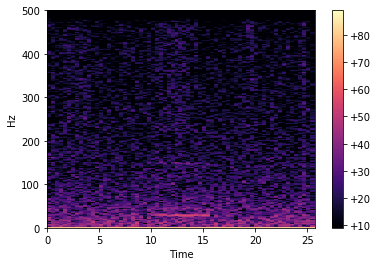

In [142]:
getNewSpec("ModData/nn01b_20180309_000000.wav", 9661.6180, 5.9482)

In [13]:
def getWavePlot(filename, start, duration):
    sound = split(filename, start, duration)
    sound = np.asarray(sound.get_array_of_samples(),dtype = np.float32)
    sound, _ = librosa.effects.trim(sound)
    librosa.display.waveplot(sound, sr=1000);
    

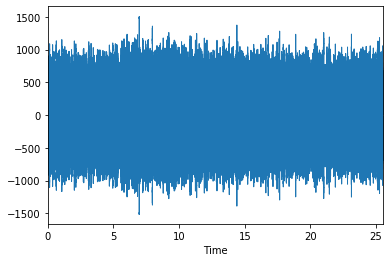

In [21]:
getWavePlot("ModData/nn06a_20181101_000000.wav", 90957.1, 4.472)

In [14]:
framesize = 512
hopsize = 384
length = 25.5
def New(filename, start, duration): 
    sound = split(filename, start, duration)
    sound = np.asarray(sound.get_array_of_samples(),dtype = np.float32)
    D = np.abs(librosa.stft(sound, n_fft=framesize,  hop_length=hopsize))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB, sr=1000, hop_length=hopsize, x_axis='time', y_axis='log');
    plt.colorbar(format='%+2.0f dB');

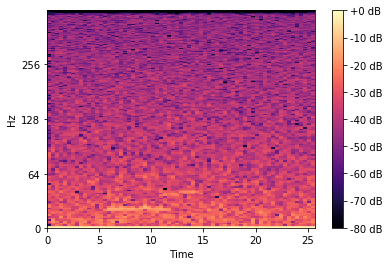

In [30]:
New("ModData/nn06a_20181101_000000.wav", 90957.1, 4.472)

In [15]:
n_fft = framesize
hop_length = hopsize
n_mels = 128
sr = 1000
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

In [16]:
def NewTwo(filename, start, duration): 
    sound = split(filename, start, duration)
    sound = np.asarray(sound.get_array_of_samples(),dtype = np.float32)
    S = librosa.feature.melspectrogram(sound, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
    plt.colorbar(format='%+2.0f dB');

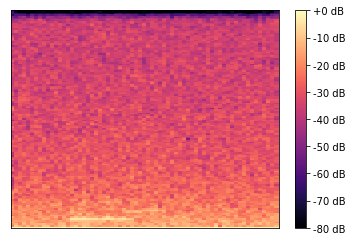

In [52]:
NewTwo("ModData/nn06a_20181101_000000.wav", 90957.1, 4.472)

In [17]:
def NewThree(filename, start, duration): 
    sound = split(filename, start, duration)
    sound = np.asarray(sound.get_array_of_samples(),dtype = np.float32)
    C = librosa.cqt(y=sound, sr=sr)
    C_db = librosa.amplitude_to_db(np.abs(C), ref=np.max)
    fig, ax = plt.subplots()
    librosa.display.specshow(C_db, y_axis='cqt_hz', x_axis='time', ax=ax)
    ax.set(title='Frequency (Hz) axis decoration')

In [93]:
NewThree("ModData/nn06a_20181101_000000.wav", 90957.1, 4.472)

ParameterError: Filter pass-band lies beyond Nyquist

In [36]:
import cv2

In [115]:
image = cv2.imread("FullData/Elephant/nn05a_20180531_000000.wav_1358.png")

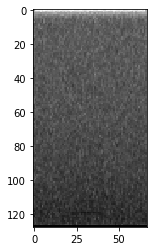

In [116]:
plt.imshow(image, cmap='gray')
plt.show()

In [127]:
alpha = 4
beta = 20
new_image = np.zeros(image.shape, image.dtype)


In [128]:
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)


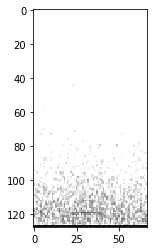

In [129]:
plt.imshow(new_image, cmap='gray')
plt.show()

In [24]:
for i in range(len(read_file)):
    read_file.loc[i]["filename"]
    try:
        ActualSpec("ModData/"+read_file.loc[i]["filename"], read_file.loc[i]["File Offset (s)"], read_file.loc[i]["duration"], "FullData/Elephant/"+read_file.loc[i]["filename"]+"_"+str(read_file.loc[i]["Selection"])+".png")
    except:
        print("FullData/Elephant/"+read_file.loc[i]["filename"]+"_"+str(read_file.loc[i]["Selection"])+".png"+" has failed")

FullData/Elephant/nn01c_20180212_000000.wav_178.png has failed
FullData/Elephant/nn05e_20180412_000000.wav_1617.png has failed
FullData/Elephant/nn06e_20190128_000000.wav_2442.png has failed


In [27]:
read_file.loc[750]

Selection                                751
High Freq (Hz)                          38.9
File Offset (s)                      23546.6
filename           nn02d_20180608_000000.wav
duration                               2.623
marginals                                NaN
Name: 750, dtype: object

In [17]:
filenames = read_file[['filename']]
all_files = filenames['filename'].unique()
all_files = pd.DataFrame(data = all_files, columns=['filename'])
all_files

,filename
0,nn01a_20180126_000000.wav
1,nn01a_20180203_000000.wav
2,nn01a_20180220_000000.wav
3,nn01a_20180305_000000.wav
4,nn01a_20180324_000000.wav
...,...
129,nn09b_20180928_000000.wav
130,nn10a_20180702_000000.wav
131,nn10a_20180913_000000.wav
132,nn10b_20180604_000000.wav


In [18]:
some.loc[1]["File Offset (s)"]

NameError: name 'some' is not defined

In [18]:
def iter(some, hunya):
    arr = []
    actual = 0
    init = 0
    for x in hunya:
        filename = some.iloc[x]["filename"]
        fileOffsetprev = some.iloc[x]["File Offset (s)"]
        fileOffset = some.iloc[x+1]["File Offset (s)"]
        duration = some.iloc[x]["duration"]
        if(fileOffset - fileOffsetprev < 60):
            actual = fileOffset
        else:
            actual = fileOffsetprev
            out = (some.iloc[init]["File Offset (s)"], actual)
            arr.append(out)
            init = x
    return arr

In [19]:
lit = []
for i in range(len(all_files)):
    some = read_file[read_file['filename'] == all_files["filename"].loc[i]]
    hunya = range(len(some)-1)
    ans = iter(some, hunya)
    lit.append(ans)
print(lit)



[[(48860.426, 48880.487), (48880.487, 49017.105), (49017.105, 51117.157)], [], [], [(6205.507, 6205.507), (6205.507, 6377.209), (6377.209, 7479.007), (7479.007, 7693.899), (7693.899, 7944.7452), (7944.7452, 8078.18), (8078.18, 8211.065999999999), (8211.065999999999, 8412.6311), (8412.6311, 8543.190999999999), (8543.190999999999, 12317.538), (12317.538, 12443.605), (12443.605, 12575.383), (12575.383, 12823.932), (12823.932, 13055.139), (13055.139, 13558.577), (13558.577, 13865.157), (13865.157, 14644.843), (14644.843, 15025.688), (15025.688, 16654.148999999998), (16654.148999999998, 16762.26), (16762.26, 16833.587), (16833.587, 17100.077), (17100.077, 17951.7)], [(58047.392, 58047.392), (58047.392, 58416.746)], [], [(48953.478, 48953.478), (48953.478, 49284.596), (49284.596, 52546.807), (52546.807, 52914.41), (52914.41, 54868.28599999999), (54868.28599999999, 55253.627), (55253.627, 61920.335), (61920.335, 62403.279)], [(37095.363, 37149.727)], [(56860.315, 56895.621), (56895.621, 57212

In [20]:
len(lit)

134

In [72]:
librosa.get_duration(filename='ModData/nn01a_20180305_000000.wav')

86339.581

In [20]:
from random import uniform, choice

In [25]:
print(lit)

[[(48860.426, 48880.487), (48880.487, 49017.105), (49017.105, 51117.157)], [], [], [(6205.507, 6205.507), (6205.507, 6377.209), (6377.209, 7479.007), (7479.007, 7693.899), (7693.899, 7944.7452), (7944.7452, 8078.18), (8078.18, 8211.065999999999), (8211.065999999999, 8412.6311), (8412.6311, 8543.190999999999), (8543.190999999999, 12317.538), (12317.538, 12443.605), (12443.605, 12575.383), (12575.383, 12823.932), (12823.932, 13055.139), (13055.139, 13558.577), (13558.577, 13865.157), (13865.157, 14644.843), (14644.843, 15025.688), (15025.688, 16654.148999999998), (16654.148999999998, 16762.26), (16762.26, 16833.587), (16833.587, 17100.077), (17100.077, 17951.7)], [(58047.392, 58047.392), (58047.392, 58416.746)], [], [(48953.478, 48953.478), (48953.478, 49284.596), (49284.596, 52546.807), (52546.807, 52914.41), (52914.41, 54868.28599999999), (54868.28599999999, 55253.627), (55253.627, 61920.335), (61920.335, 62403.279)], [(37095.363, 37149.727)], [(56860.315, 56895.621), (56895.621, 57212

In [21]:
temp = []
ant = 0
all = []
for et in range(len(lit)):
    temp = lit[et]
    copy = []
    if temp:
        copy.append((0, temp[0][0]))
        for r in range(len(temp)-1):
            copy.append((temp[r][1], temp[r+1][0]))
        copy.append((temp[len(temp)-1][1], 86339.0))
    else:
        copy.append((0, 86339.0))
    all.append(copy)
print(all)
lit = all

[[(0, 48860.426), (48880.487, 48880.487), (49017.105, 49017.105), (51117.157, 86339.0)], [(0, 86339.0)], [(0, 86339.0)], [(0, 6205.507), (6205.507, 6205.507), (6377.209, 6377.209), (7479.007, 7479.007), (7693.899, 7693.899), (7944.7452, 7944.7452), (8078.18, 8078.18), (8211.065999999999, 8211.065999999999), (8412.6311, 8412.6311), (8543.190999999999, 8543.190999999999), (12317.538, 12317.538), (12443.605, 12443.605), (12575.383, 12575.383), (12823.932, 12823.932), (13055.139, 13055.139), (13558.577, 13558.577), (13865.157, 13865.157), (14644.843, 14644.843), (15025.688, 15025.688), (16654.148999999998, 16654.148999999998), (16762.26, 16762.26), (16833.587, 16833.587), (17100.077, 17100.077), (17951.7, 86339.0)], [(0, 58047.392), (58047.392, 58047.392), (58416.746, 86339.0)], [(0, 86339.0)], [(0, 48953.478), (48953.478, 48953.478), (49284.596, 49284.596), (52546.807, 52546.807), (52914.41, 52914.41), (54868.28599999999, 54868.28599999999), (55253.627, 55253.627), (61920.335, 61920.335),

In [22]:
x = 0
for i in range(len(all_files)):
    choisearr = []
    some = read_file[read_file['filename'] == all_files["filename"].loc[i]]
    some.reset_index(inplace = True)
    somenum = len(some["filename"])
    for y in range(somenum):
        for ran in lit[i]:
            choisearr.append(uniform(ran[0], ran[1]))
        p = choice(choisearr)
        try:
            ActualSpec("ModData/"+all_files["filename"].loc[i], p, 25.5, "FullData/Non/"+all_files["filename"].loc[i]+"_"+str(y)+".png")
        except:
            print("FullData/Non/"+all_files["filename"].loc[i]+"_"+str(y)+".png"+" has failed")
        choisearr.clear()
#         some["filename"][y]
#         choice([randint(1,5),randint(9,15),randint(21,27)])

In [73]:
2 + 2

4

In [21]:
for i in range(len(read_file)):
    read_file.loc[i]["filename"]
    try:
        ActualSpec("ModData/"+read_file.loc[i]["filename"], read_file.loc[i]["File Offset (s)"], read_file.loc[i]["duration"], "TrialData/Elephant/"+read_file.loc[i]["filename"]+"_"+str(read_file.loc[i]["Selection"])+".png")
    except:
        print("TrialData/Elephant/"+read_file.loc[i]["filename"]+"_"+str(read_file.loc[i]["Selection"])+".png"+" has failed")

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=512 is too small for input signal of length=0
  n_fft, y.shape[-1]


TrialData/Elephant/nn01c_20180212_000000.wav_178.png has failed
TrialData/Elephant/nn05e_20180412_000000.wav_1617.png has failed
TrialData/Elephant/nn06e_20190128_000000.wav_2442.png has failed
